# The SV's
hw 4

## Imports

In [1]:
# basic
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# data manipulation
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# models
from sklearn.svm import SVC, SVR

# preset data
from sklearn.datasets import load_breast_cancer

## Setup

In [2]:
dataset = load_breast_cancer()

In [3]:
cancer_data = dataset.data
cancer_data.shape

(569, 30)

In [4]:
cancer_labels = dataset.target
cancer_labels = np.reshape(cancer_labels,(len(cancer_labels),1))
cancer_labels.shape

(569, 1)

In [5]:
cancer_data = np.concatenate([cancer_data,cancer_labels],axis=1)
cancer_data.shape

(569, 31)

In [6]:
cancer_df = pd.DataFrame(cancer_data)
cancer_df.columns = np.append(dataset.feature_names, 'target')
print(f'Shape: {cancer_df.shape}')
cancer_df.tail()

Shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [7]:
class_names=['Benign' , 'Malignant'] # name of classes
def remap_labels(data_series):
    data_series.replace(0, class_names[0],inplace=True)
    data_series.replace(1, class_names[1],inplace=True)

In [8]:
# remap_labels(cancer_df['target'])
# cancer_df.tail()

In [9]:
print(cancer_df.shape)
features = cancer_df.columns.values

(569, 31)


## Confusion function

In [10]:
def print_conf_matrix(confusion_matrix, conf_title, class_labels):
    fig, ax = plt.subplots()
    # create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_labels, yticklabels=class_labels)
    ax.xaxis.set_label_position("top")
    ax.xaxis.set_ticks_position("top")
    plt.tight_layout()
    plt.title(conf_title, y=1.15);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');

# Part 1
SVM

## Setup

In [11]:
q_num = "Q1: SVC"

x_df = cancer_df.copy()
y_df = x_df.pop('target')

In [12]:
x_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
y_df

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

In [14]:
x = x_df.values
y = y_df.values

print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

print(f"{features.shape} with values of", features)

x shape: (569, 30)
y shape: (569,)
(31,) with values of ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'
 'target']


In [15]:
scaler = MinMaxScaler()
# scaler = StandardScaler()

x = scaler.fit_transform(x)
x

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

## Split and Train function

In [16]:
def train_svc (x, y, kernel:str, penalty = 10, gamma="auto", test_size = 0.2):
    # print("train_shape:" , x_decomp.shape) # Debug line
    
    # --- SPLIT DATA
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = test_size, random_state=20)
    # print("x training size: ", x_train.shape)   # Debug line
    # print("y training size: ", y_train.shape)   # Debug line
    # print("x test size: ", x_test.shape)   # Debug line
    # print("y test size: ", y_test.shape)   # Debug line

    # --- TRAIN MODEL
    classifier = SVC(kernel=kernel, C=penalty, gamma=gamma)
    classifier.fit(x_train, y_train)

    # --- REPORT DATA
    y_pred = classifier.predict(x_test)
    
    return y_test , y_pred

## Decomposition

In [17]:
class_names=['Benign' , 'Malignant'] # name of classes
confusion_list = list()
report_list = list()
report_list_string = list()

# linear at 8 dimensions and penalty = 50
# ---- one wrong
# rbf at 5 dimensions and penalty of 100
# ---- perfect

for num_components in range(1, (x.shape)[1] + 1):
    column_components = ['Component ' + str(item)   for item in range(1 , num_components + 1)]
    print(f"{num_components} Component PCA ({q_num})" + '\n')
    
    # --- DECOMPOSE
    pca = PCA(n_components=num_components)
    principalComponents = pca.fit_transform(x.copy())
    principal_df = pd.DataFrame(data = principalComponents, 
                            columns = column_components
                )
    print('PCA shape:' , principalComponents.shape)
    
    
    # --- DATA FRAME
    decomp_df = pd.concat([principal_df, y_df.copy()], axis = 1)
    print(decomp_df) 
    print('\n')
    
    
    # --- CONVERT DATA FROM DATA FRAME 
    x_decomp = decomp_df
    y_decomp = x_decomp.pop('target')
    x_decomp = x_decomp.values
    y_decomp = y_decomp.values
    # print(f"x shape: {x_decomp.shape}") 
    # print(x_decomp)
    # print(f"y shape: {y_decomp.shape}")
    # print(y_decomp)
    
    y_test , y_pred = train_svc(x_decomp, y_decomp, 'rbf', 100)
    
    
    print(metrics.classification_report(y_test, y_pred, digits=4, output_dict=False))
    
    report_list_string.append(metrics.classification_report(y_test, y_pred, digits=4))
    report_list.append(metrics.classification_report(y_test, y_pred, output_dict=True))
    confusion_list.append(metrics.confusion_matrix(y_test, y_pred))
    
   
    print('\n' + '-'*75  +  '\n')

1 Component PCA (Q1: SVC)

PCA shape: (569, 1)
     Component 1  target
0       1.387021     0.0
1       0.462308     0.0
2       0.954621     0.0
3       1.000816     0.0
4       0.626828     0.0
..           ...     ...
564     1.002840     0.0
565     0.620757     0.0
566     0.226311     0.0
567     1.677834     0.0
568    -0.905068     1.0

[569 rows x 2 columns]


              precision    recall  f1-score   support

         0.0     0.9767    0.8750    0.9231        48
         1.0     0.9155    0.9848    0.9489        66

    accuracy                         0.9386       114
   macro avg     0.9461    0.9299    0.9360       114
weighted avg     0.9413    0.9386    0.9380       114


---------------------------------------------------------------------------

2 Component PCA (Q1: SVC)

PCA shape: (569, 2)
     Component 1  Component 2  target
0       1.387021     0.426895     0.0
1       0.462308    -0.556947     0.0
2       0.954621    -0.109701     0.0
3       1.000816     1.

In [18]:
accuracy_list = list()
precision_list = list()
recall_list = list()

for report in report_list:
    accuracy_list.append(  report["accuracy"]                    )
    precision_list.append((report["weighted avg"])['precision']  )
    recall_list.append(   (report["weighted avg"])['recall']     )

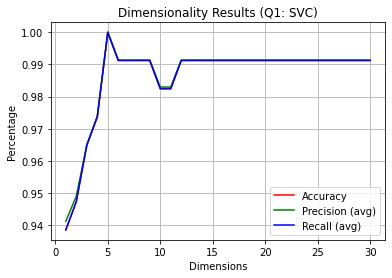

In [19]:
# print report_list stats
plt.figure(1)
plt.plot(range(1, len(accuracy_list)+1) , accuracy_list , color='r')
plt.plot(range(1, len(precision_list)+1) , precision_list , color='g')
plt.plot(range(1, len(recall_list)+1) , recall_list , color='b')
plt.grid() 
plt.xlabel('Dimensions') 
plt.ylabel('Percentage') 
plt.legend(["Accuracy", "Precision (avg)", "Recall (avg)"])
plt.title(f"Dimensionality Results ({q_num})") ;

## Output

In [22]:
inspect_dimension = 5


# print('\t\t', inspect_dimension, "Dimension Report\n")
print(report_list_string[inspect_dimension-1])
# print_conf_matrix(confusion_list[inspect_dimension - 1], f"Confusion Matrix of {inspect_dimension} dimensions ({q_num})", class_names)

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        48
         1.0     1.0000    1.0000    1.0000        66

    accuracy                         1.0000       114
   macro avg     1.0000    1.0000    1.0000       114
weighted avg     1.0000    1.0000    1.0000       114



# Part 2
SVR

## Setup

## Operation